In [951]:
fingers=[1 for i in range(8)]
alphabet="abcdefghijklmnopqrstuvwxyz,.?;"

In [952]:
def setKeyboards(alphabetS):
    keyCopy=[['a' for i in range(3)] for j in range(8)]
    for i in range(3):
        keyCopy[3].append('a')
        keyCopy[4].append('a')
    letters=0
    for i in range(len(keyCopy)):
        for j in range(len(keyCopy[i])):
            keyCopy[i][j]=alphabetS[letters]
            letters+=1
    return keyCopy

In [953]:

def addTime(a,b):
    c=0
    if a==b:
        c=0
    else:
        a,b=min(a,b),max(a,b)
    if b-a==3:
        c=1
    if a == 0 and b == 1:
        c=1.032
    if a==0 and b==2:
        c=2.138
    if a==0 and b==4:
        c=1.605
    if a==0 and b==5:
        c=2.661
    if a==1 and b==2:
        c=1.118
    if a==1 and b==3:
        c=1.247
    if a==1 and b==5:
        c=1.803
    if a==2 and b==3:
        c=2.015
    if a==2 and b==4:
        c=1.118
    if a==2 and b==4:
        c=1.118
    if a==3 and b==4:
        c=1.032
    if a==3 and b==5:
        c=2.138
    if a==4 and b==5:
        c=1.118
    return float(c)

In [954]:
def Readtext(text,keyboards):
    time =0.000
    text=text.lower()
    text=list(text)
    for l in range(len(text)):
        other = True
        iGood=0
        for i in range(len(keyboards)):
            for j in range(len(keyboards[i])):
                if text[l]==keyboards[i][j]:
                    text[l]=j
                    iGood=i
                    other=False
        if not other:
            time+=addTime(text[l],fingers[iGood])
            fingers[iGood]=text[l]
    return time

In [955]:
def fillKeyBoards(keymodif):
    alphabetCopy=list(alphabet)
    inMore=[]
    listCar=[]
    for i in range(4):
        for j in range(len(keymodif[i])):
            listCar.append(keymodif[i][j])
    for i in range(4,8):
        for j in range(len(keymodif[i])):
            inMore.append(keymodif[i][j])
            for k in range(len(listCar)):
                if listCar[k]==keymodif[i][j]:
                    keymodif[i][j]='%'
    for i in range (len(alphabetCopy)):
        for j in range(len(listCar)):
            if listCar[j]==alphabetCopy[i]:
                alphabetCopy[i]='$'
        for k in range(len(inMore)):
            if inMore[k]==alphabetCopy[i]:
                alphabetCopy[i]='$'
    alphabetCopy= [x for x in alphabetCopy if x!='$']
    alphabetCopy=''.join(random.sample(alphabetCopy, len(alphabetCopy)))
    letter2=0
    for i in range(len(keymodif)):
       for j in range(len(keymodif[i])):
          if keymodif[i][j]=='%':
             keymodif[i][j]=alphabetCopy[letter2]
             letter2+=1

In [956]:
def createNewKeyboards(tabFitness,tabKeyboards):
    tabFitnessCopy=tabFitness.copy()
    tabKeyboardsCopy=tabKeyboards.copy()

    for i in range(10):
        for j in range(10):
          if tabFitnessCopy[i]<=tabFitness[0]:
            tabKeyboards[0]=tabKeyboardsCopy[i]
            tabFitness[0]=tabFitnessCopy[i]
    for i in range(1,6):
        tabKeyboards[i][4:]=tabKeyboardsCopy[i+1][4:]
        tabKeyboards[i+1][4:]=tabKeyboardsCopy[i][4:]
        fillKeyBoards(tabKeyboards[i])
    for i in range(6,10):
        alphabetShuffle=''.join(random.sample(alphabet, len(alphabet)))
        tabKeyboards[i]=setKeyboards(alphabetShuffle)

    return tabKeyboards,tabFitness



In [957]:
import random
tabKeyboards=[]
tabFitness=[]
for i in range(10):
    alphabetShuffle=''.join(random.sample(alphabet, len(alphabet)))
    keyTemp=setKeyboards(alphabetShuffle)
    tabKeyboards.append(keyTemp)
    tabFitness.append(0.000)

[22.378999999999998, 20.077, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 18.853, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 17.496, 16.493000000000002, 16.493000000000

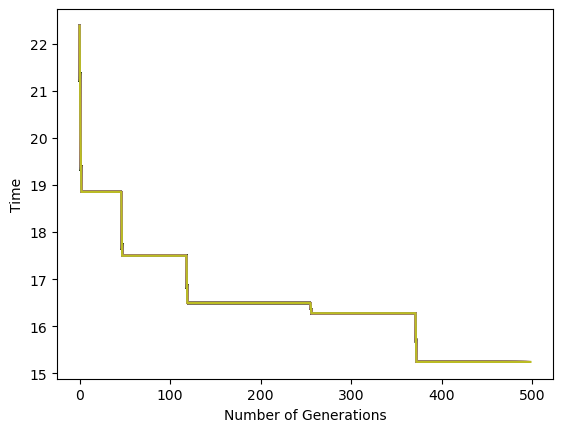

In [959]:
import matplotlib.pyplot as plt
ySchema=[]
for test in range(500):
    for i in range(10):
        fingers=[1 for j in range(8)]
        tabFitness[i]=Readtext('starfoulah comoment ca va mon reuf?',tabKeyboards[i])
    tabKeyboards,tabFitness=createNewKeyboards(tabFitness,tabKeyboards)
    if test>20:
        plt.plot([xSchema for xSchema in range(test)],ySchema)
        plt.xlabel("Number of Generations")
        plt.ylabel("Time")
    ySchema.append(tabFitness[0])